# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [26]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style



df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


C:\Users\Riku\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


With your dataframe set up, time to start creating visualizations!

In [8]:
df.value_counts()

bookID  title                                                                authors                                      average_rating  isbn        isbn13         language_code    num_pages  ratings_count  text_reviews_count  publication_date  publisher                    year
1       Harry Potter and the Half-Blood Prince (Harry Potter  #6)            J.K. Rowling/Mary GrandPré                   4.57            0439785960  9780439785969  eng            652          139.712667     27.591              9/16/2006         Scholastic Inc.              2006    1
28533   Well of Darkness (Sovereign Stone  #1)                               Margaret Weis/Tracy Hickman                  3.67            0061020575  9780061020575  eng            562          0.136600       0.049               9/4/2001          HarperTorch                  2001    1
28511   Warrior Angel                                                        Margaret Weis/Lizz Weis                      3.15            0060833254  

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


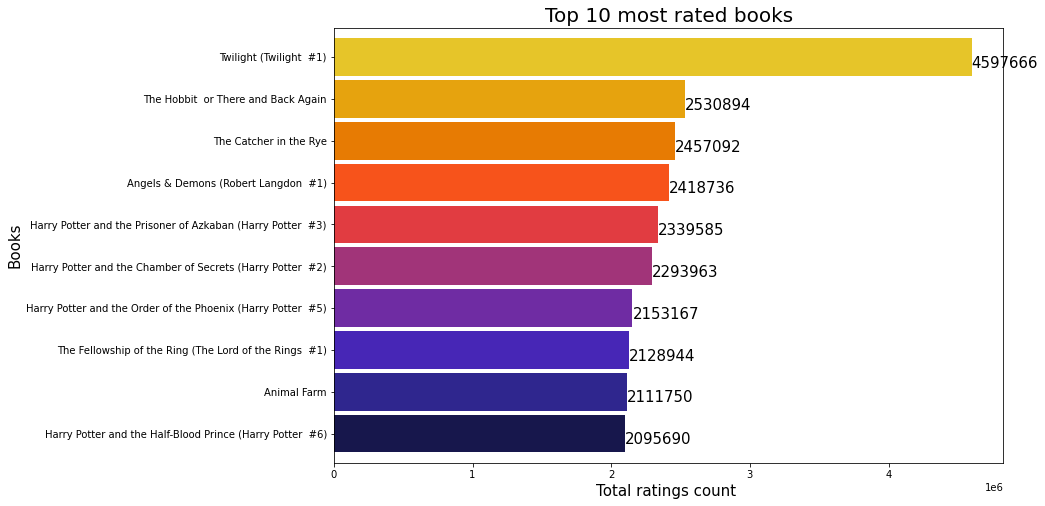

In [4]:
# Use your Python skills to create a visualization here.
most_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sb.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

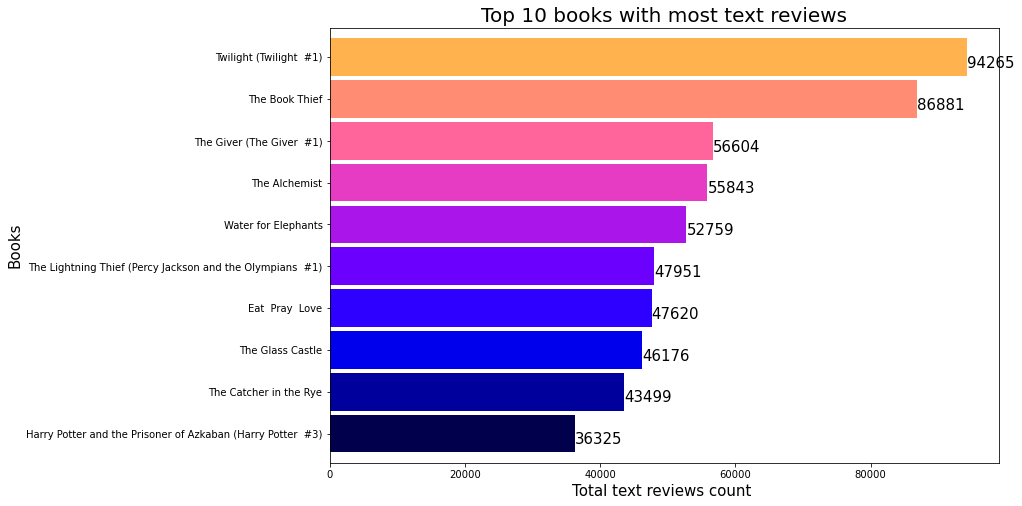

In [5]:
# Use your Python skills to create a visualization here.
most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sb.color_palette('gnuplot2',12))
ax.set_xlabel("Total text reviews count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with most text reviews",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [11]:
corr_columns = [ 'ratings_count', 'text_reviews_count']
corr_mat = df[corr_columns].corr()
corr_mat

,ratings_count,text_reviews_count
ratings_count,1.000000,0.865977
text_reviews_count,0.865977,1.000000
